# Project: Investigate a Dataset - TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project I'll be expolering the TMDb movie dataset. This data set contains information about 10,000 movies collected from The Movie Database(TMDb). Column name includes:

- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepagev
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj

> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
> With this dataset I'll be exlporing the revenue of movies based on the three variables: popularity, budget, and release data. In particular I'll be asking these questions:

- What is the ideal lenght of movie **runtime** for higher **revenue**?
- Does a higher **budget** equate to more **revenue**?
- What **month of the year** generally has the highest **revenue**?
- Is there a correlation between a movies **popularity** and its **revenue**?

> I will also be exploring the **profit** of movies based on the same variables for each question, and compare the results (this will require that a profit column is created).

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will be doing some general data wrangling and cleaning. I will start by loading in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties
> The first few line of code will be displaying the properties of the data. I first look at the first five rows of the data and get an idea of the column names and their values. Then look at the shape, some mathematical properties and finally number of non-null values. 

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> It looks like some of the values in columns budget, revenue, runtime etc., are zero instead of null. I'll be converting these to null to simplify the data and make mathematical properties like mean and minimum more accurate.

In [8]:
# Convert zero values to null
zero_to_nan = ['runtime','budget','revenue','budget_adj','revenue_adj']
df[zero_to_nan] = df[zero_to_nan].replace(0, np.NAN)

# Look at the number of null values in each row
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> I'll now start the cleaning process of the data. First, I'll will lose column that have no significance to the analysis. I will also get rid of any duplicate row. Since columns like runtime, budget, and revenue are crucial to the analysis and since they have many rows with a null value, I will drop all column with a null value to maintain accuracy. Let's get started!
 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Dropping columns not need for this analysis
drop_column = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_year']
df.drop(drop_column, axis = 1, inplace = True)

In [11]:
# Dropping duplicate rows
df.drop_duplicates(inplace = True)

In [12]:
# Drop all rows with null values
df.dropna(axis = 0, inplace = True)

> One of the questions requires that I have a parameter that I don't currently have, month. To get this parameter, I will change the release_data variable to datetime type. From their, I will isolate the month and create a column for it. Furthermore, I'll create a column for profit as it is my second independant variable.

In [13]:
# Change release_date to datetime
df['release_date'] =  pd.to_datetime(df['release_date'])

In [14]:
# Creates a column for month by isolating the month from the date
df['month'] = df['release_date'].apply(lambda x: x.month)

In [15]:
# Subtract revenue from budget to get the profit
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

> Lets take a look at how our data is looking!

In [16]:
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,profit,profit_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,6,1.363529e+09,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,5,2.284364e+08,2.101614e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,1.012000e+08,2.716190e+08,3,1.852382e+08,1.704191e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,12,1.868178e+09,1.718723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09,4,1.316249e+09,1.210949e+09


In [17]:
df.shape

(3854, 13)

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,month,profit,profit_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08,7.042294,7.048292e+07,9.282470e+07
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08,3.362829,1.506195e+08,1.940715e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00,1.000000,-4.139124e+08,-4.139124e+08
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07,4.000000,-1.321535e+06,-1.504995e+06
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07,7.000000,2.002019e+07,2.737064e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08,10.000000,8.170331e+07,1.074548e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09,12.000000,2.544506e+09,2.750137e+09


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
runtime           3854 non-null float64
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
month             3854 non-null int64
profit            3854 non-null float64
profit_adj        3854 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 421.5+ KB


In [20]:
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
runtime                  float64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
budget_adj               float64
revenue_adj              float64
month                      int64
profit                   float64
profit_adj               float64
dtype: object

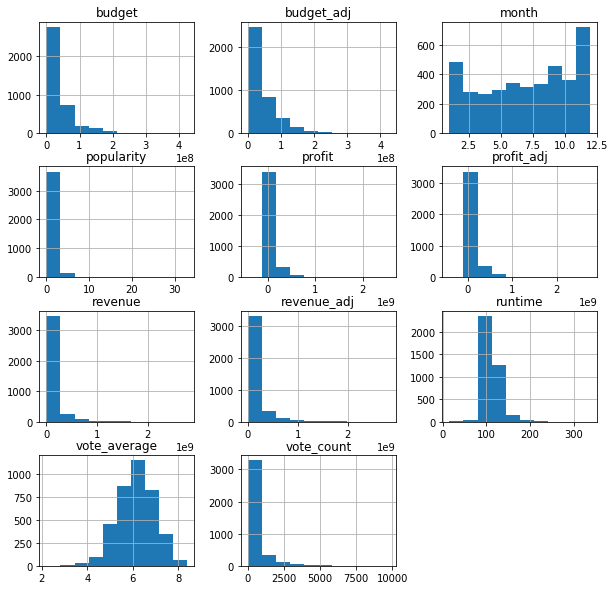

In [21]:
df.hist(figsize = (10, 10));

> Looking good! Let's now move to exploring and analyzing the data!

<a id='eda'></a>
## Exploratory Data Analysis

> I'll now explore the data and seek to answer the questions that were posed at the beginning of the notebook. Their will be a mixture of some statistical analysis that offer an informative look at the data, and I'll also plot graphs to give those analysis visual representation. I'll be compare how certain variables affect the revenue of a movie or if there is any correlation, and then I'll check to see if that translate to the profits. And just for depth and context, I'll be analyzing both normal and adjusted revenue and profit. Let's get started! 


### Research Question 1: What is the ideal lenght of movie runtime for higher revenue?

> To answer this question, I had to apply the groupby function to only get unique values of runtime. From there, I determined that I would need to get the average revenue/profit to see what the general incomes of movies are at particular runtimes. But first, I want to know which runtime is the most popular for movie makers and which is least. I used count to find out which runtime is most and least popular. 

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


# Count the occurrences of each unique value in the 'runtime' column
value_counts = df['runtime'].value_counts()

# Get the most appearing runtime
most_appearing = value_counts.idxmax()

# Get the least appearing runtime
least_appearing = value_counts.idxmin()

print("Most appearing runtime:", int(most_appearing), 'min')
print("Least appearing runtime:", int(least_appearing), 'min')

Most appearing runtime: 100 min
Least appearing runtime: 201 min


> It looks like 100 min (1hr40min) appears the most in our dataset, while 201 min (3hrs21) is the least common. This is to be expected as most movies are around 90 min to 120 min. Interestingly, when you look at the graph below you will notice that the average revenue for 100 min is one of the lowest while for 201 min it's one of the highest.

> Now I'll create simple funtions to plot the graphs and display statistical information, and which will be used for all variables for this particular question. The first, **runtime_value**, basicaly plots the average revenue/profit for all unique runtime values. The second, **min_max_runtime**, simply looks at the runtime with the most and least average revenue/profit.

In [23]:
def runtime_value(column_name, title):
    
    # Group the data by 'runtime' and calculate the column average
    column_average = df.groupby('runtime')[column_name].mean()

    # Create a bar plot to visualize the column average for each runtime value
    column_average.plot(kind='bar', figsize=(30, 30))
    plt.xlabel('Runtime (min)')
    plt.ylabel('Average ' + title)
    plt.title('Average ' + title + ' for Unique Runtime Values')

    plt.show()

In [24]:
def min_max_runtime(column_name, title):
    
    # Group the data by 'runtime' and calculate the column average
    column_average = df.groupby('runtime')[column_name].mean()
    
    # Find the runtime with the lowest average revenue
    lowest_runtime = column_average.idxmin()
    lowest_column_avg = column_average.min()

    # Find the runtime with the highest average revenue
    highest_runtime = column_average.idxmax()
    highest_column_avg = column_average.max()

    # Display the results
    print("Runtime with the Lowest Average " + title + ":")
    print("Runtime:", lowest_runtime)
    print("Average " + title + ":", lowest_column_avg)

    print("\nRuntime with the Highest Average " + title + ":")
    print("Runtime:", highest_runtime)
    print("Average " + title + ":", highest_column_avg)

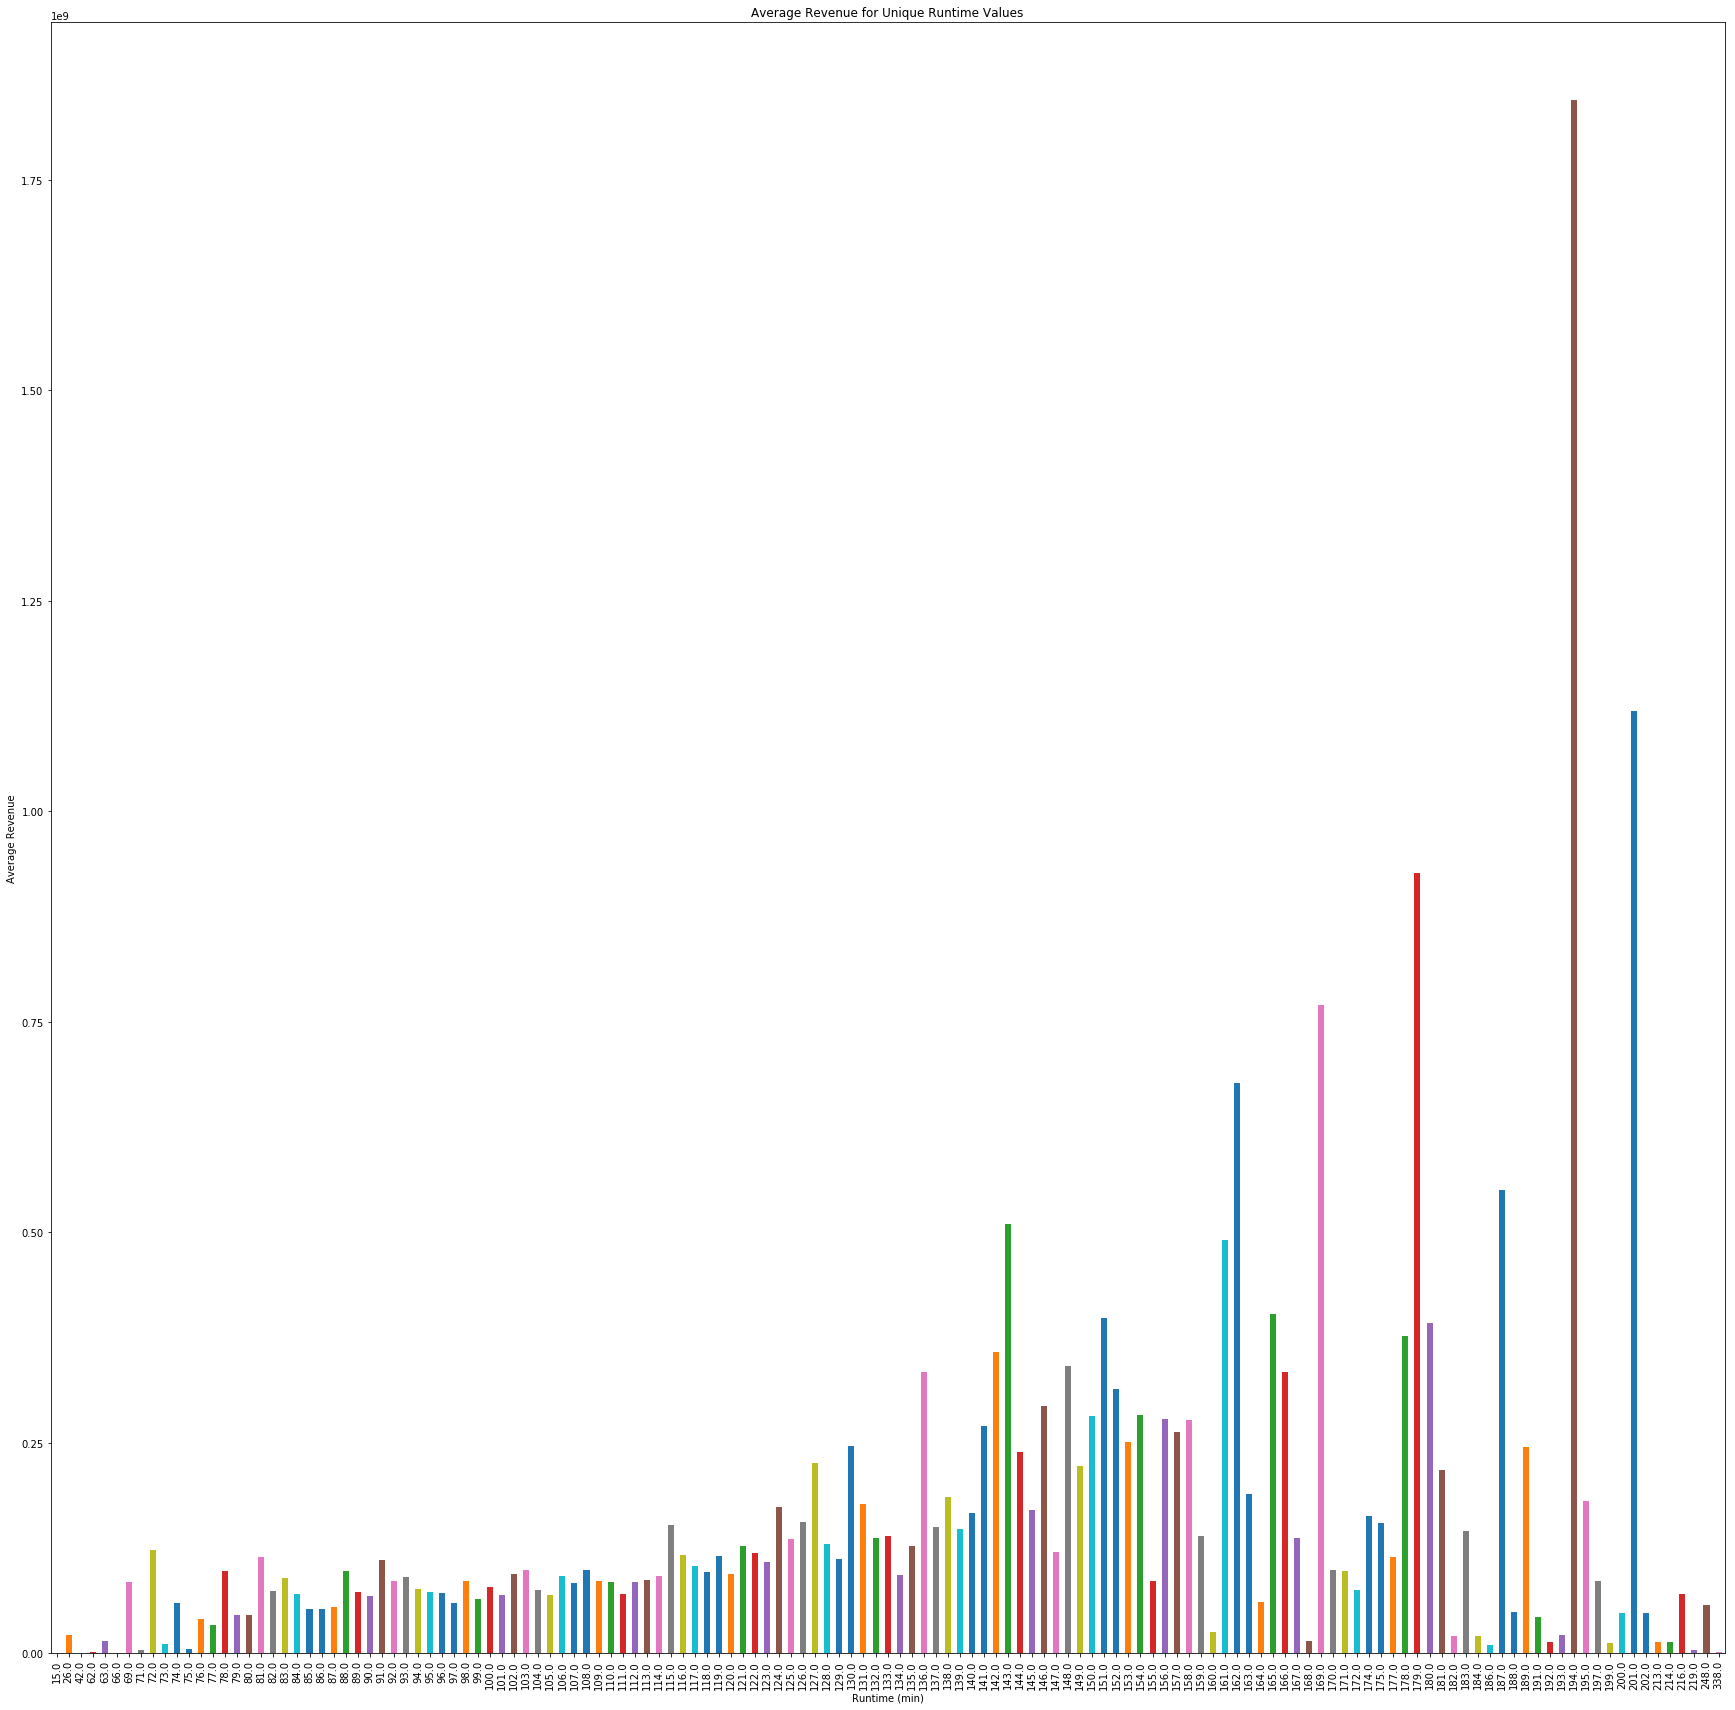

In [25]:
runtime_value('revenue', 'Revenue')

In [26]:
min_max_runtime('revenue', 'Revenue')

Runtime with the Lowest Average Revenue:
Runtime: 42.0
Average Revenue: 3.0

Runtime with the Highest Average Revenue:
Runtime: 194.0
Average Revenue: 1845034188.0


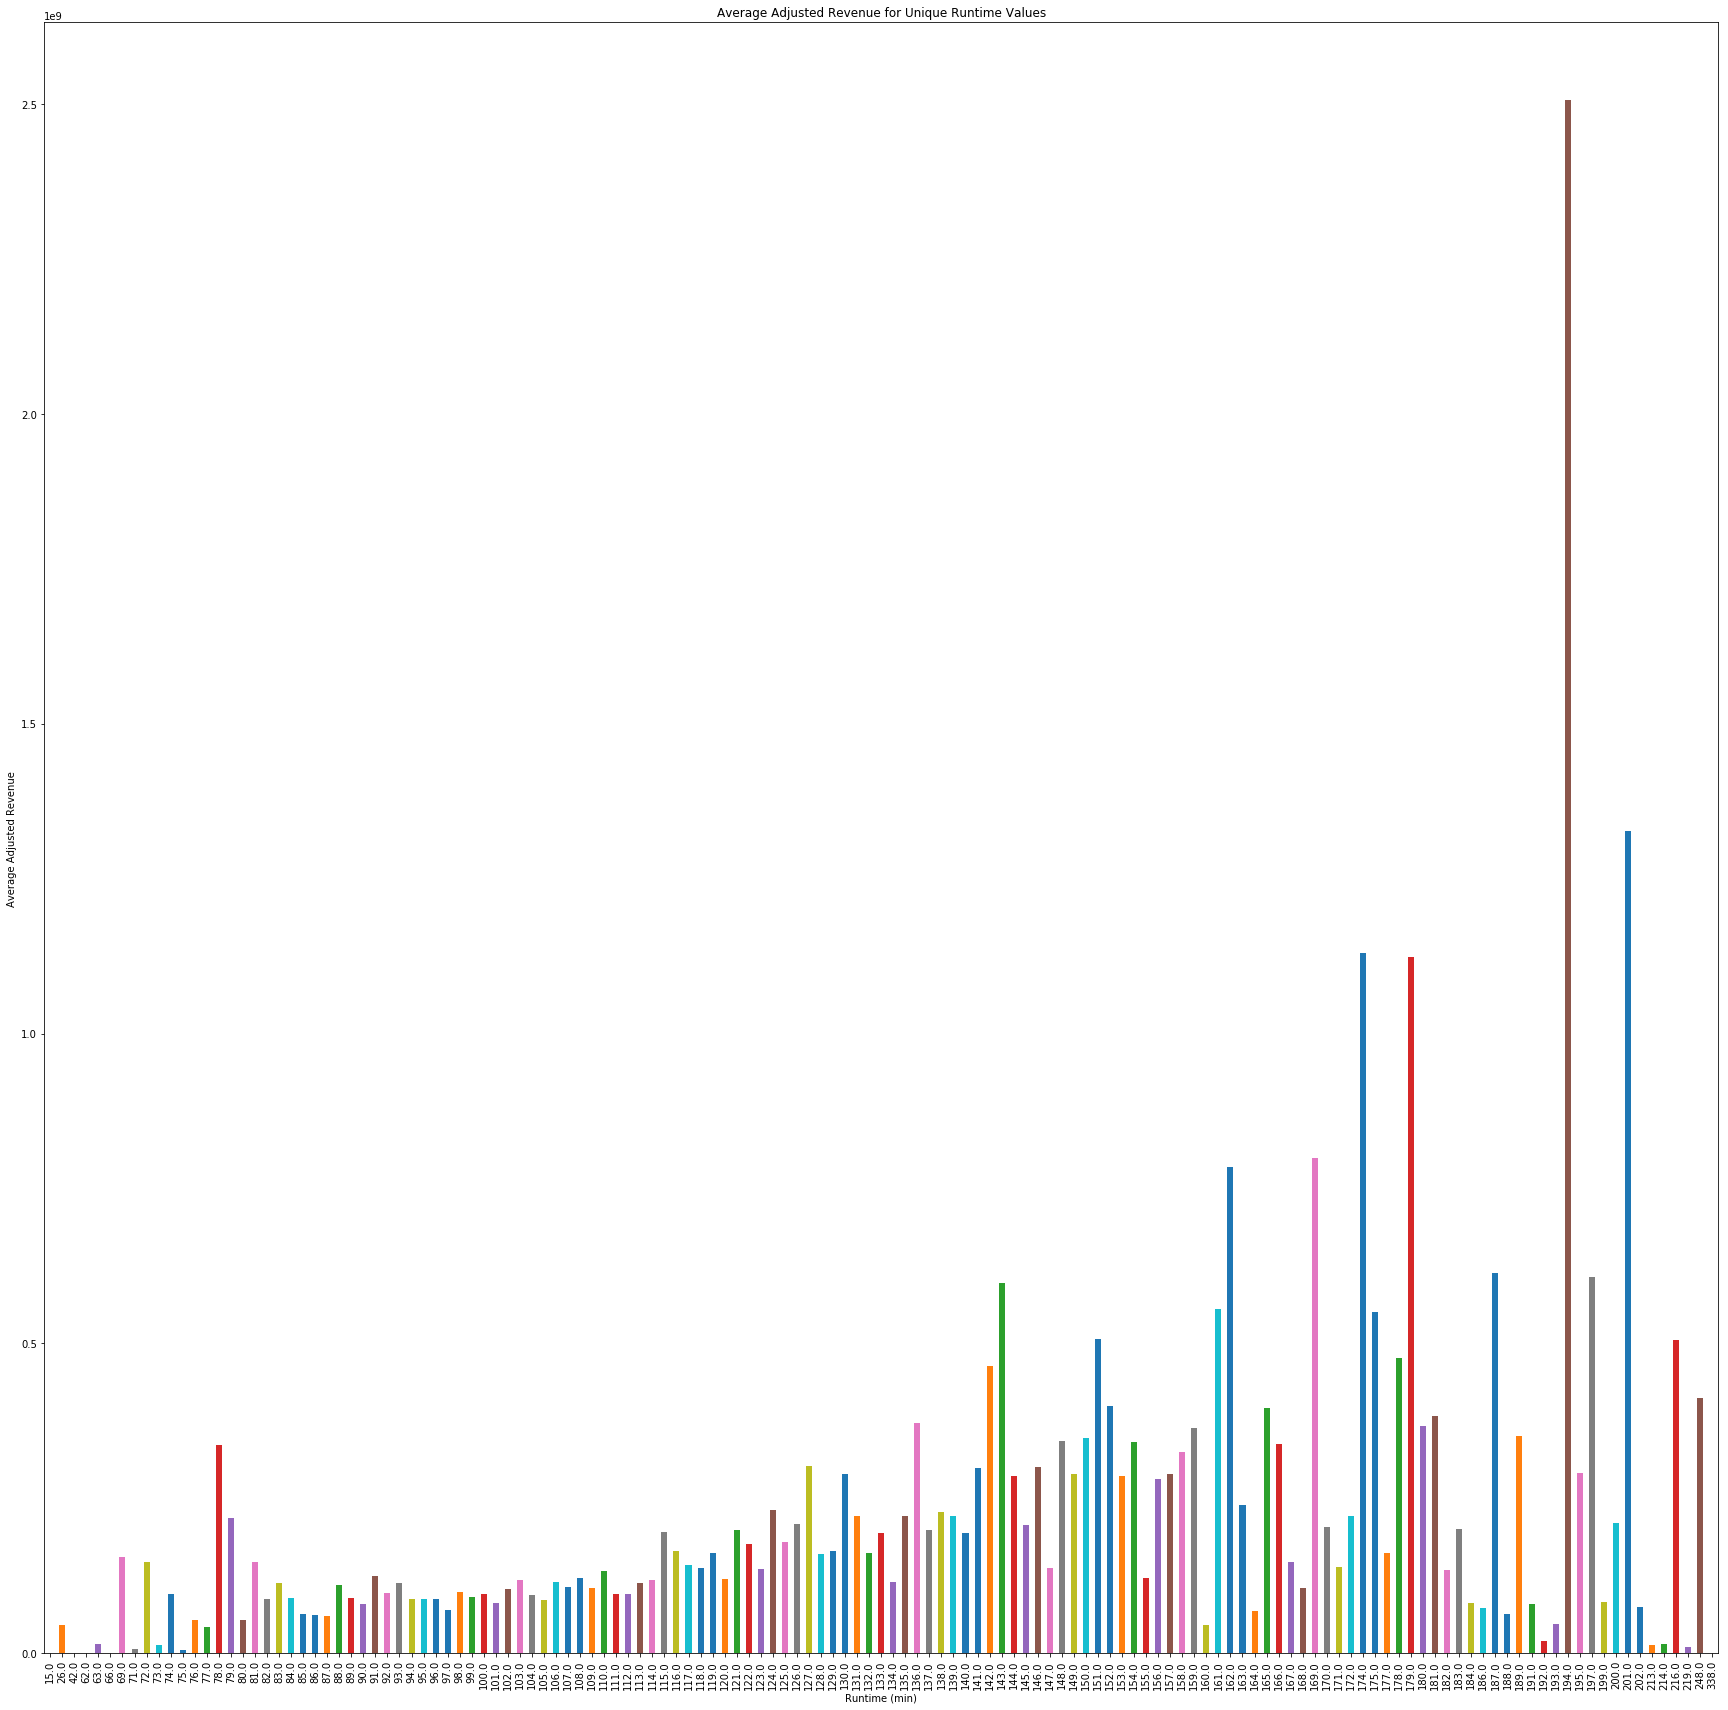

In [27]:
runtime_value('revenue_adj', 'Adjusted Revenue')

In [28]:
min_max_runtime('revenue_adj', 'Adjusted Revenue')

Runtime with the Lowest Average Adjusted Revenue:
Runtime: 42.0
Average Adjusted Revenue: 3.03835990143

Runtime with the Highest Average Adjusted Revenue:
Runtime: 194.0
Average Adjusted Revenue: 2506405735.42


> Suprisingly, the runtime with the highest average revenue is over 3hrs. You'd expect a 2hrs movie to be the ideal runtime. The expectation was a normal curve, where the futher you got from the center the less money you make. Also noted that there is some differences going from normal revenue to adjusted. Some the runtime went from rather small values to much larger values. In some case, there were runtimes, like 216 min, that were smaller than other runtimes, like 189 min, in the first graph but get larger in the second.

> I'll now take a look at how profits fare with regards to the runtime. Do we get similar results? Let's find out.

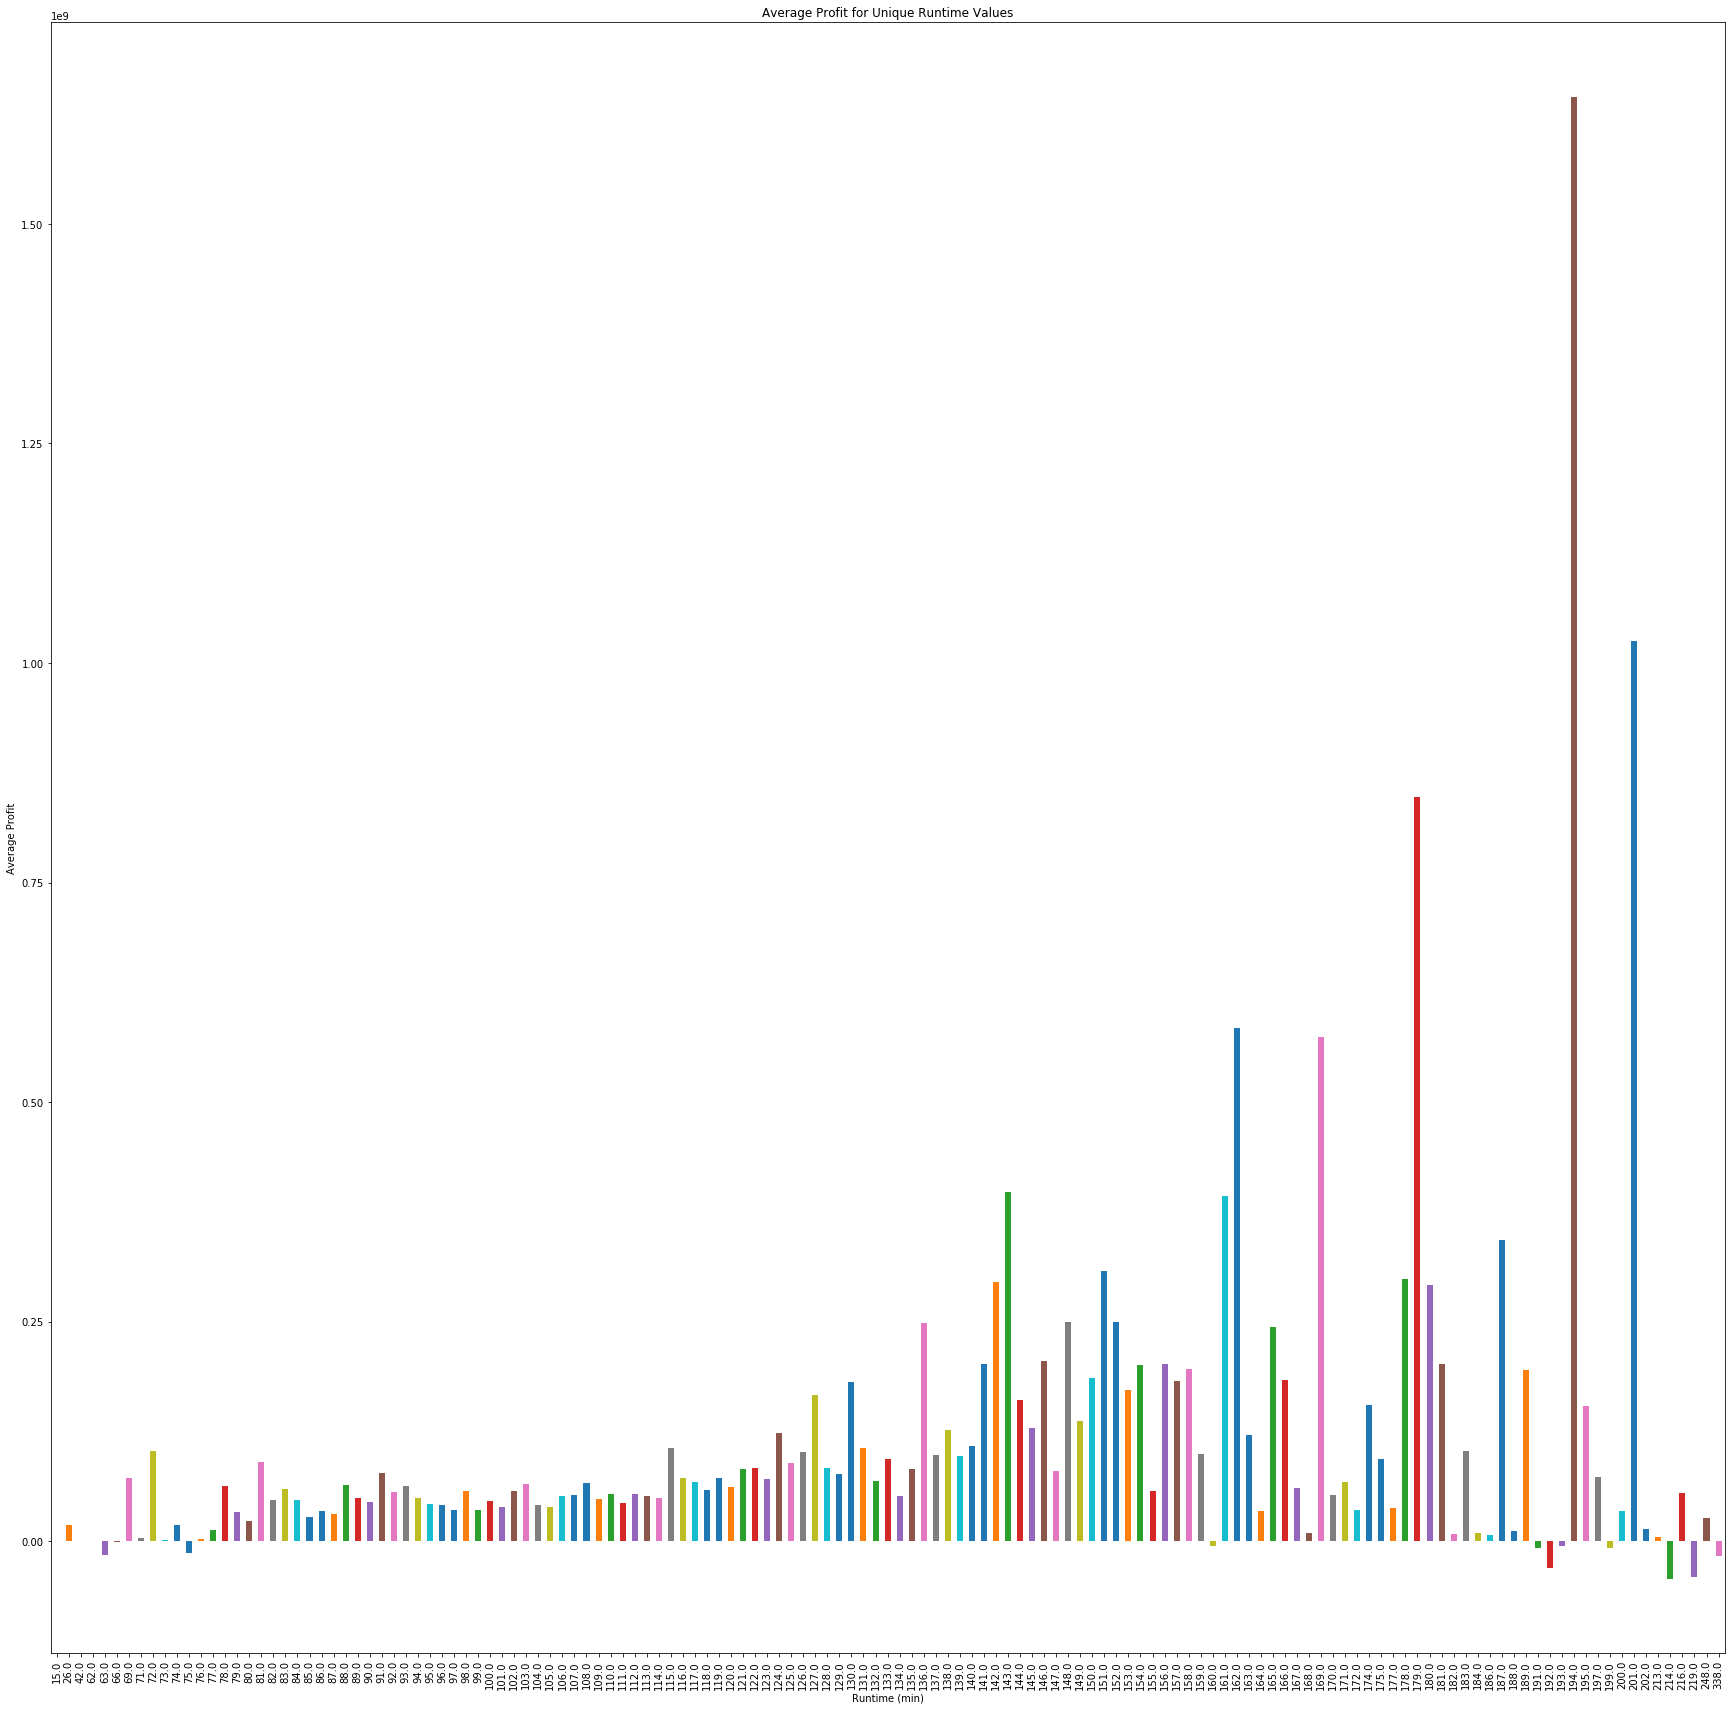

In [29]:
runtime_value('profit', 'Profit')

In [30]:
min_max_runtime('profit', 'Profit')

Runtime with the Lowest Average Profit:
Runtime: 214.0
Average Profit: -43076064.0

Runtime with the Highest Average Profit:
Runtime: 194.0
Average Profit: 1645034188.0


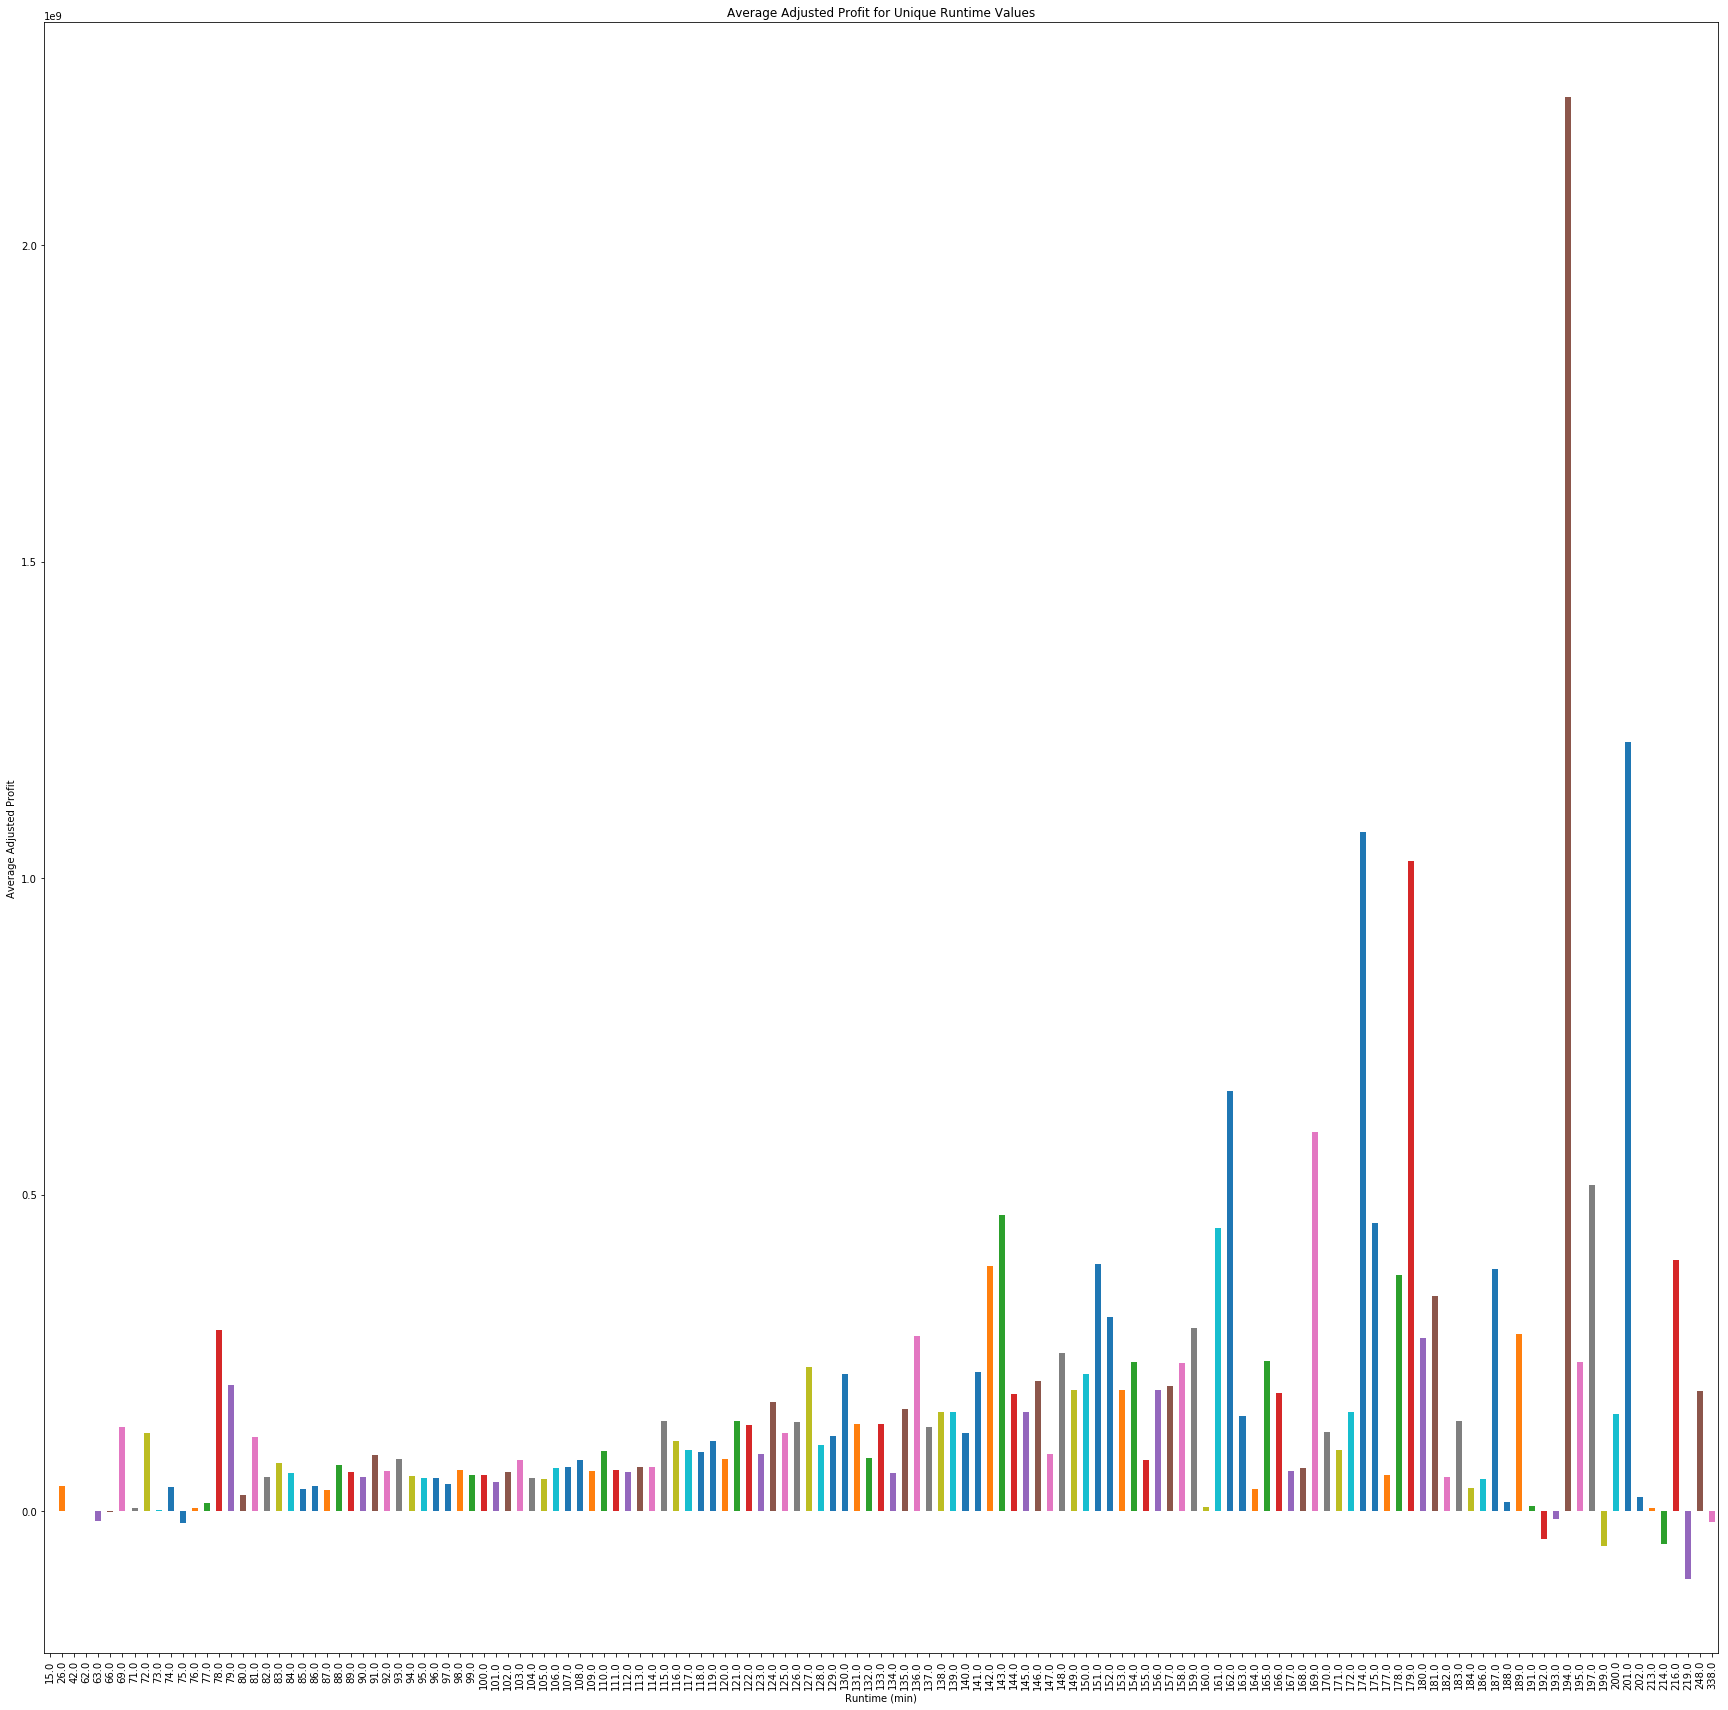

In [31]:
runtime_value('profit_adj', 'Adjusted Profit')

In [32]:
min_max_runtime('profit_adj', 'Adjusted Profit')

Runtime with the Lowest Average Adjusted Profit:
Runtime: 219.0
Average Adjusted Profit: -107205949.243

Runtime with the Highest Average Adjusted Profit:
Runtime: 194.0
Average Adjusted Profit: 2234713671.21


> There's no difference from average revenue when it comes to the highest average profit compared to average revenue (adusted or not), but there's a big difference in regards to the lowest average profit. Here we see that lower profits are associated with the 214 min (219 min for adjusted profit) runtime as opposed to the 42 min runtime we observed in the revenue graph.

> Overall, movies with a longer runtime seem to perform better than movie with a shorter runtime. This could be due to how rare longer movies are and that they usually require a higher budget to produce and in turn are of better quality, have better casting, directing and editing.

### Research Question 2: Does a higher budget equate to more revenue?

> With this question, I simply want to see if there is a positive correlation between a movies budget and its revenue/profit. To do this, I created a simple function that plots a scatter plot and displays the correlation of the variebles.

In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

def calculate_corr(column1, column2, title):
    df.plot(x=column1, y=column2, kind='scatter', title=title + ' Correlation');
    # Calculate the correlation coefficient
    correlation = df[column1].corr(df[column2])

    print("Correlation coefficient:", correlation)

Correlation coefficient: 0.688556152464


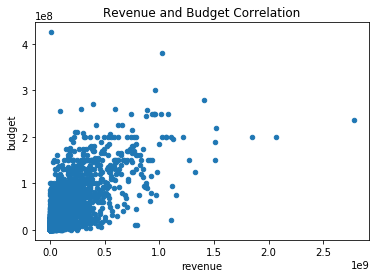

In [34]:
calculate_corr('revenue', 'budget', 'Revenue and Budget')

Correlation coefficient: 0.570451019581


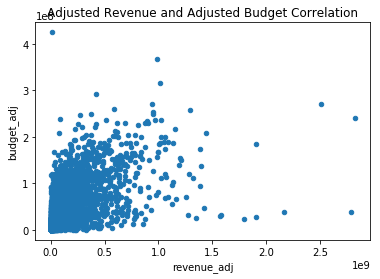

In [35]:
calculate_corr('revenue_adj', 'budget_adj', 'Adjusted Revenue and Adjusted Budget')

Correlation coefficient: 0.526817653992


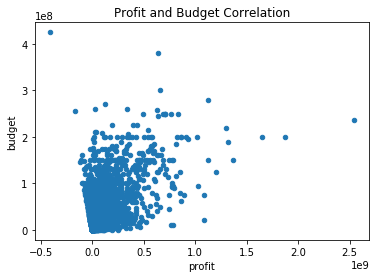

In [36]:
calculate_corr('profit', 'budget', 'Profit and Budget')

Correlation coefficient: 0.40434429074


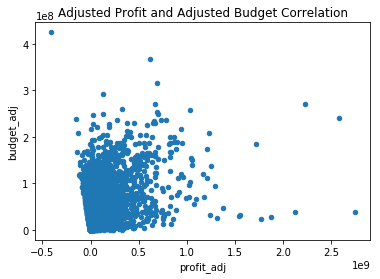

In [37]:
calculate_corr('profit_adj', 'budget_adj', 'Adjusted Profit and Adjusted Budget')

> From the results, we can see a slight correlation between budget and revenue, leading us to believe that higher budget movies result in higher revenues. The same is seen in relation to profits, there seems to be a low positive correlation. This is a little suprising as one would expect higher budgetted movies to have better quality in production, casting and even writting.

> Overall, this finding seems to indicate that higher budget slightly equates to higher revenue and higher profits. This might come down to the whether the writing quality of the movie is good rather than the movie being expensive. There can be cases where a movie looks expensive but isn't good, but on in contrast, there can be low budget movies that perform really well due to the quality of writing. 

### Research Question 3: What month of the year generally has the highest revenue?

> For this question, I wanted to know which month is most popular for movie goers and most favourable for movie makers. Just like before, I'm using the groupby function to get an average revenue/profit value for all unique months. Also, I once again will check to see which month has the most and least movies released.

In [38]:
# Count the occurrences of each unique value in the 'month' column
value_counts = df['month'].value_counts()

# Get the most appearing month
most_appearing = value_counts.idxmax()

# Get the least appearing month
least_appearing = value_counts.idxmin()

print("Most appearing month:", most_appearing)
print("Least appearing month:", least_appearing)

Most appearing month: 9
Least appearing month: 1


> It looks like Septemper is the month where most movies (at least from this downsized dataset) are released, and January has the least movies released. Once again I expected a different outcome. I expected the holidays, summer or winter, to have the most movies released. But since this a fraction of the original data, we might not be getting the full picture.

> Next, I'm creating a function similar to runtime_value, but this will of course be looking at the month column.

In [39]:
def month_value(column_name, title):
    
    # Group the data by 'month' and calculate the column average
    column_average = df.groupby('month')[column_name].mean()

    # Create a bar plot to visualize the column average for each month
    column_average.plot(kind='bar', figsize=(10, 10))
    plt.xlabel('Month')
    plt.ylabel('Average ' + title)
    plt.title('Average ' + title + ' Per Month')

    plt.show()

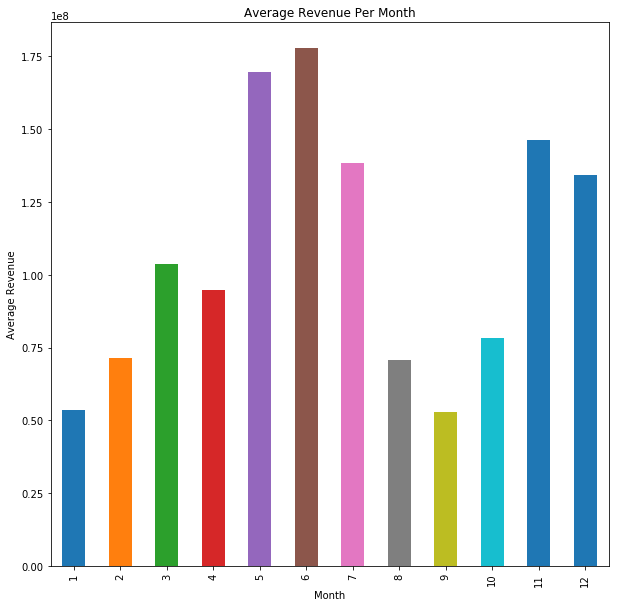

In [40]:
month_value('revenue', 'Revenue')

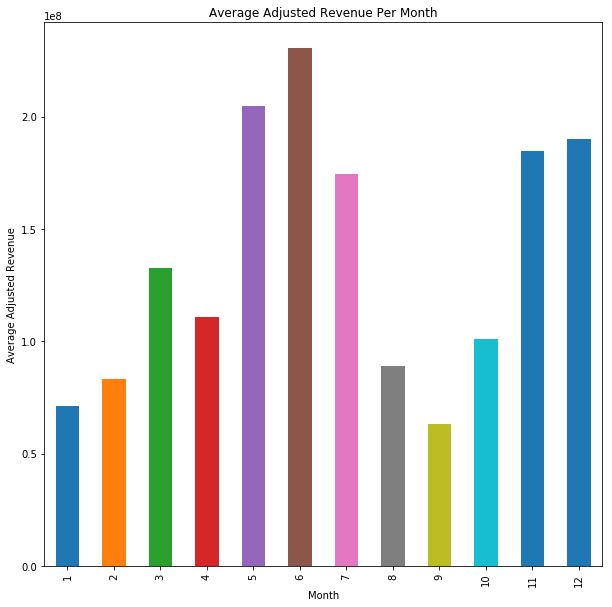

In [41]:
month_value('revenue_adj', 'Adjusted Revenue')

> In both these graphs we can see that June is the highest grossing month followed by May and then December. Septermber is the least grossing month of the year followed by January, which were the two months we saw previously as the months with the most and least movies released on respectively. The results don't seem to be any different with profits, June is still the more profitable month while January is the least.

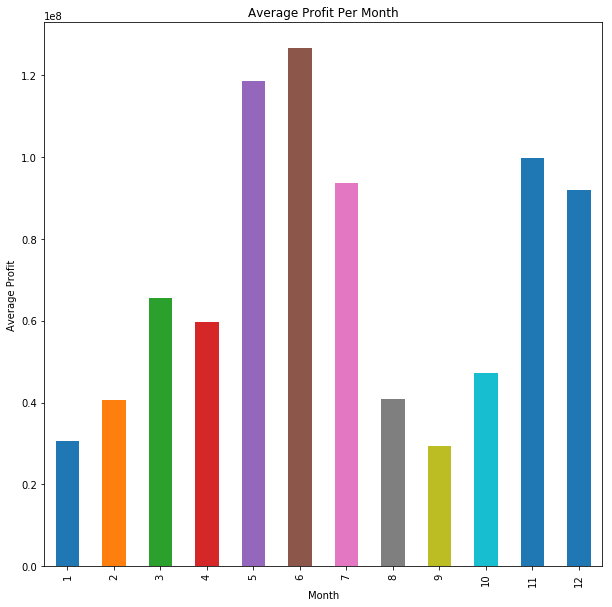

In [42]:
month_value('profit', 'Profit')

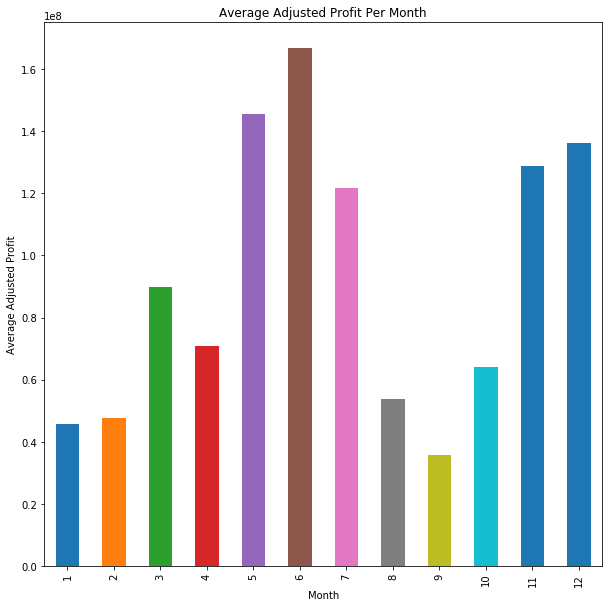

In [43]:
month_value('profit_adj', 'Adjusted Profit')

> The overall result here is as expected. The holiday months are the more profitable months for movies while non holiday months are not as profitable. So if a movie wants to do well in the box office, aim for a release date around the summer or winter break.

### Research Question 4: Is there a correlation between a movies popularity and its revenue?

> For the last question, I'll once again utilize the **calculate_corr()** funtion to look at the correlation of movie popularity with revenue/profit.

Correlation coefficient: 0.615534654555


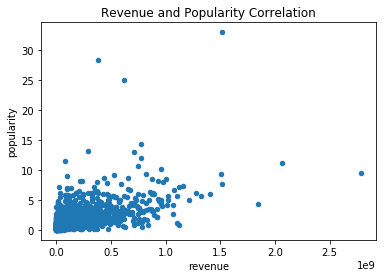

In [44]:
calculate_corr('revenue', 'popularity', 'Revenue and Popularity')

Correlation coefficient: 0.546959184617


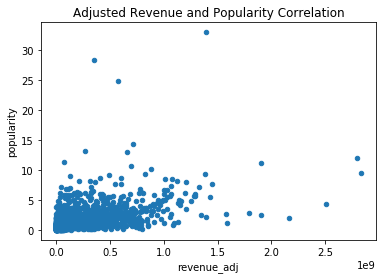

In [45]:
calculate_corr('revenue_adj', 'popularity', 'Adjusted Revenue and Popularity')

Correlation coefficient: 0.596201367492


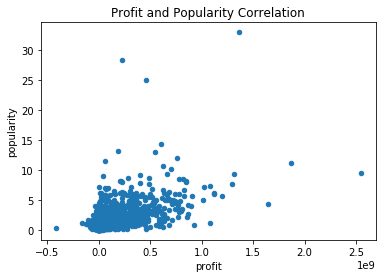

In [46]:
calculate_corr('profit', 'popularity', 'Profit and Popularity')

Correlation coefficient: 0.516867613545


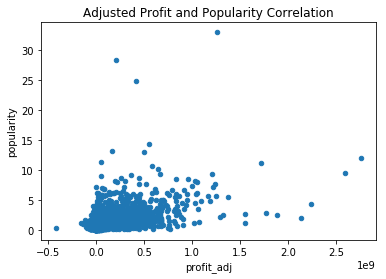

In [47]:
calculate_corr('profit_adj', 'popularity', 'Adjusted Profit and Popularity')

> Suprisingly, there doesn't seem to be a strong correlation between a movies popularity and its revenue/profit. The correlation here appears to be low. This could be due to the rating system of this particular dataset, so I take it with a grain of salt.

<a id='conclusions'></a>
## Conclusions

> In conclusion, our analysis has given us a lot of insight into what makes movies profitable or not. We've looked at the runtime of a movie and how that may affect its profits and revenue, and we discovered that longer movies in general tend to do better than shorter movies. 
> We looked at the relationship between a movies budget and its revenue/profit. We discovered that the correlation between those variables are small. It is important to acknowledge that a big chunk of the data had to be dropped to run this analysis, and thus might affect the results.
> We saw that certain months perform better than others in the box office and those months tend tend to be during vacation breaks. Suprisingly, according to the dataset, most movies have been released during the least profitable month which is September. Once again, the shortened dataset might be a contributing factor to this.
> Finally, we looked at the popularity rating of a movie and how it related to its income. Just like with budget, the correlation was small when you'd expect a high positive correlation. This could be due to the rating system applied to this dataset, it doesn't seem to be based on a percentage score or 1-10 rating system.

## Submitting your Project 

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0